In [18]:
#import pickle
# pickle.dump(d,open("near_sfc_precip.pkl","wb"))
import numpy as np
#read pickle file
#d = pickle.load(open("near_sfc_precip.pkl","rb"))
np_file=np.load("near_sfc_precip.npz")
print(np_file)
precip_corra=d = np_file['corra']
precip_gmi_only=np_file['gmi_only']
from skimage.registration import optical_flow_ilk
flow = optical_flow_ilk(precip_gmi_only,precip_corra)
# move precip_gmi_only using the flow
from scipy.ndimage import map_coordinates



NpzFile 'near_sfc_precip.npz' with keys: corra, gmi_only


[[1.         0.63481911]
 [0.63481911 1.        ]]
[[1.         0.44461594]
 [0.44461594 1.        ]]


/Users/mgrecu/miniforge3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mgrecu/miniforge3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


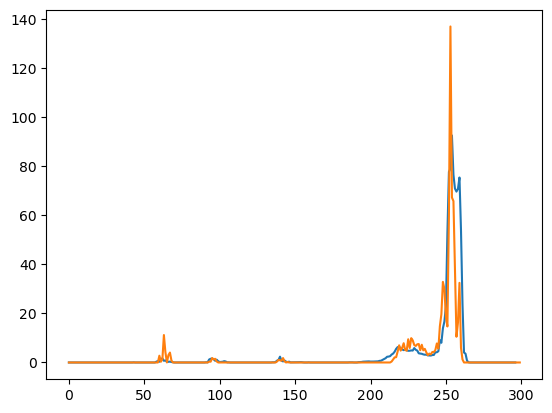

In [55]:
plt.plot(precip_gmi_only[3:,24])
plt.plot(precip_corra[:,24])
print(np.corrcoef(precip_gmi_only[3:,:].flatten(),precip_corra[:-3,:].flatten()))
print(np.corrcoef(precip_gmi_only[:,:].flatten(),precip_corra[:,:].flatten()))
index_L=[]
act_corr=[]
displacement = np.zeros((precip_gmi_only.shape[0]))
nw2=4
nmax=4
n_size=precip_gmi_only.shape[0]
for i in range(nw2+nmax,n_size-nw2-nmax):
    corr=[]
    for j in range(-nmax,nmax+1):
        if precip_gmi_only[i+j-nw2:i+j+nw2+1,:].max()<0.01 or precip_corra[i-nw2:i+nw2+1,:].max()<0.01:
            corr.append(0)
        corr.append(np.corrcoef(precip_gmi_only[i+j-nw2:i+j+nw2+1,:].flatten(),precip_corra[i-nw2:i+nw2+1,:].flatten())[0,1])
    index=np.argmax(corr)
    displacement[i]=index-4
    act_corr.append(corr[index])
    index_L.append([i,index-4])

from scipy.ndimage import gaussian_filter
inv_displacement=(gaussian_filter(displacement, sigma=1)).astype(int)
precip_gmi_only_shifted = precip_gmi_only.copy()
for i in range(precip_gmi_only.shape[0]):
    for j in range(precip_gmi_only.shape[1]):
        if i+inv_displacement[i] > 0 and i+inv_displacement[i] < precip_gmi_only.shape[0]:
            precip_gmi_only_shifted[i,j]=precip_gmi_only[i+inv_displacement[i],j]
        

In [56]:
print(np.corrcoef(precip_gmi_only_shifted[:,:].flatten(),precip_corra[:,:].flatten()))

[[1.        0.6260834]
 [0.6260834 1.       ]]


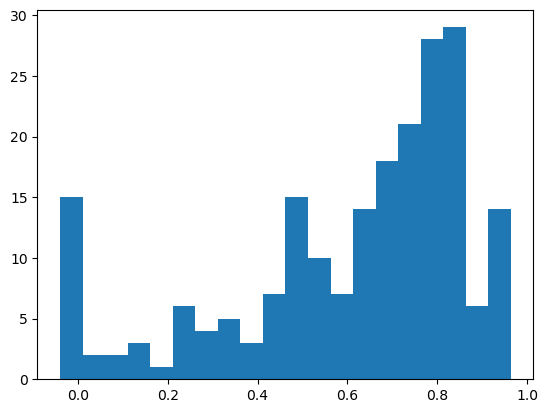

In [50]:
h2=plt.hist(act_corr,bins=20)

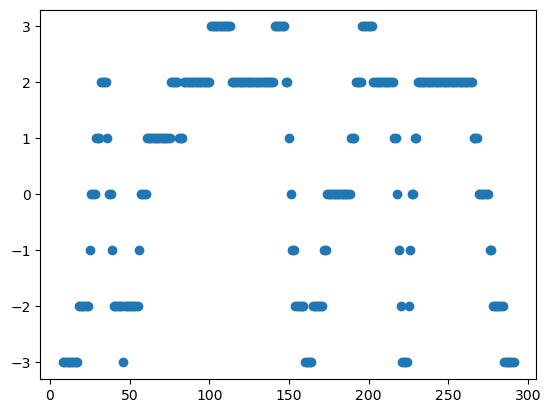

In [49]:
index_L=np.array(index_L)
#plt.hist(index_L[:,1],bins=10)
from scipy.ndimage import gaussian_filter
plt.scatter(index_L[:,0],gaussian_filter(index_L[:,1],sigma=2))
#plt.plot(index_L[:,0],index_L[:,1])

[[  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.         0.         0.       ...   0.         0.         0.      ]
 ...
 [-19.646154 -19.709278 -19.512297 ...   0.         0.         0.      ]
 [-20.465746 -20.534302 -20.40862  ...   0.         0.         0.      ]
 [-20.864298 -20.907927 -20.82708  ...   0.         0.         0.      ]]
[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [8.082069  8.093722  8.042595  ... 0.        0.        0.       ]
 [7.306874  7.2990847 7.112457  ... 0.        0.        0.       ]
 [7.2175126 7.206845  6.8967    ... 0.        0.        0.       ]]


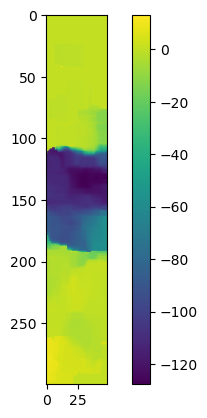

In [24]:
print(flow[0])
print(flow[1])
import matplotlib.pyplot as plt
plt.imshow(flow[1])
plt.colorbar()